# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

Present By\
Muhammad Fu'ad Saifuddin\
Email : muh.fuad.saifuddin@gmail.com\
Linkedin :<https://www.linkedin.com/in/muhammad-fuad-saifuddin/>\
Github : <https://github.com/fuad-saifuddin>

## Background

“Sebuah perusahaan dapat berkembang dengan pesat saat mengetahui perilaku customer personality nya, sehingga dapat memberikan layanan serta manfaat lebih baik kepada customers yang berpotensi menjadi loyal customers. Dengan mengolah data historical marketing campaign guna menaikkan performa dan menyasar customers yang tepat agar dapat bertransaksi di platform perusahaan, dari insight data tersebut fokus kita adalah membuat sebuah model prediksi kluster sehingga memudahkan perusahaan dalam membuat keputusan ”


In [258]:
# Import modul yang digunakan`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
# Membuka dataset marketing_campaign_data.csv dan melihat informasi terkait kolom yang ada di dalamnya
df = pd.read_csv('marketing_campaign_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [260]:
# Sampling isi dari dataset untuk melihat gambaran dataset
df.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
438,438,5455,1971,S3,Menikah,32011000.0,1,0,22-08-2013,89,...,7,0,0,0,0,0,0,3,11,0
496,496,8737,1978,S1,Cerai,55563000.0,0,1,05-04-2014,22,...,3,0,0,0,0,0,0,3,11,0
1717,1717,7629,1977,S1,Menikah,22108000.0,1,1,08-05-2014,46,...,7,0,0,0,0,0,0,3,11,0
1774,1774,2694,1967,S1,Menikah,42664000.0,0,1,18-03-2014,44,...,6,0,0,0,0,0,0,3,11,0
878,878,1446,1956,S2,Lajang,86424000.0,0,0,05-04-2014,12,...,1,0,0,0,0,0,0,3,11,0
184,184,2563,1961,SMA,Menikah,28249000.0,0,0,15-06-2014,80,...,6,0,0,0,0,0,0,3,11,0
950,950,7574,1979,S3,Bertunangan,27922000.0,1,0,10-05-2014,80,...,4,0,0,0,0,0,0,3,11,0
862,862,9553,1987,S1,Menikah,7500000.0,0,0,09-01-2013,94,...,6,0,0,0,0,0,0,3,11,0
169,169,3152,1957,S1,Bertunangan,26091000.0,1,1,25-02-2014,84,...,5,0,0,0,0,0,0,3,11,0
346,346,8553,1965,S1,Menikah,44300000.0,1,1,23-06-2013,65,...,6,0,0,0,0,0,0,3,11,0


Ditemukan ada satu kolom yang tidak memiliki nama kolom yaitu Unnamed :0, dan jika dilihat nilai data di kolom Unnamed: 0 identik dengan nomor di index

In [261]:
# Melihat duplikat di kolom Unnamed: 0 dan kolom ID
df[['Unnamed: 0','ID']].duplicated().sum()

0

Kolom __Unnamed: 0__ tidak memiliki duplikat, yang memperkuat asumsi bahwa kolom tersebut merupakan kolom dengan nilai index. Selain itu karena sudah terdapat kolom __ID__ yang juga unique per barisnya, maka kita dapat drop kolom __Unnamed: 0__ karena tidak diperlukan

In [262]:
# Drop kolom Unnamed: 0
df = df.drop(columns='Unnamed: 0')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [264]:
# Memisahkan data kategorik dan data numerik untuk dilihat deskripsi masing masing kolomnya
cat =[]
num =[]

for column in df:
    types = df[column].dtypes
    if types in ['int64', 'float64']:
        num.append(column)
    else :
        cat.append(column)

In [265]:
df[cat]

,Education,Marital_Status,Dt_Customer
0,S1,Lajang,04-09-2012
1,S1,Lajang,08-03-2014
2,S1,Bertunangan,21-08-2013
3,S1,Bertunangan,10-02-2014
4,S3,Menikah,19-01-2014
...,...,...,...
2235,S1,Menikah,13-06-2013
2236,S3,Bertunangan,10-06-2014
2237,S1,Cerai,25-01-2014
2238,S2,Bertunangan,24-01-2014


In [266]:
df[cat].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,6,663
top,S1,Menikah,31-08-2012
freq,1127,864,12


In [267]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [268]:
df[num]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138000.0,0,0,58,635000,88000,546000,172000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344000.0,1,1,38,11000,1000,6000,2000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613000.0,0,0,26,426000,49000,127000,111000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646000.0,1,0,26,11000,4000,20000,10000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293000.0,1,0,94,173000,43000,118000,46000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223000.0,0,1,46,709000,43000,182000,42000,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,64014000.0,2,1,56,406000,0,30000,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,56981000.0,0,0,91,908000,48000,217000,32000,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,69245000.0,0,1,8,428000,30000,214000,80000,...,3,0,0,0,0,0,0,3,11,0


In [269]:
df[num].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntCoke              2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [271]:
# Melihat value yang ada pada kolom Response
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [272]:
# Menghitung nilai conversion rate berdasarkan Response dan NumberWebVisitMonth
df['conversion_rate']= df['Response']/df['NumWebVisitsMonth']

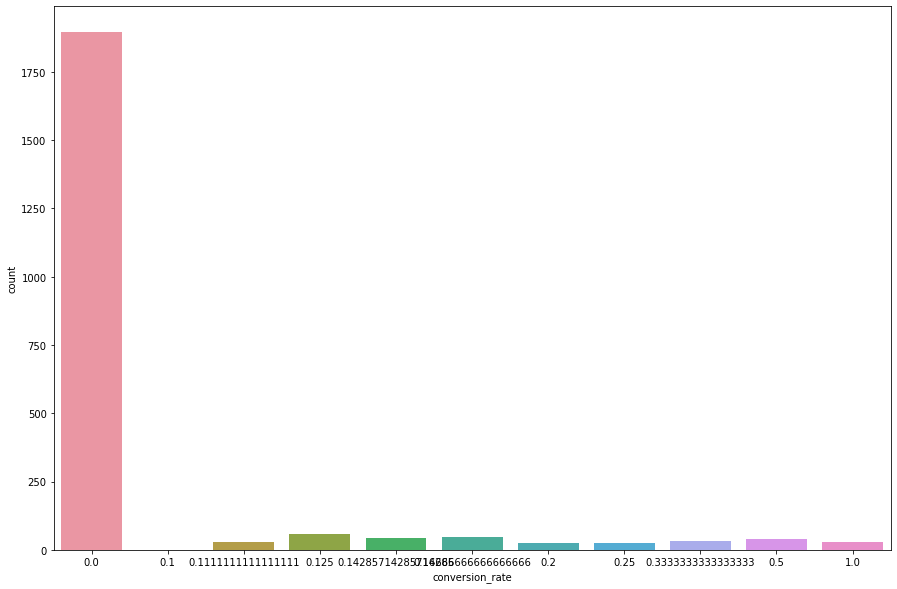

In [273]:
# Melihat distribusi nilai conversion rate pelanggan
plt.figure(figsize=(15,10))
ax = sns.countplot(data = df, x='conversion_rate')
plt.show()

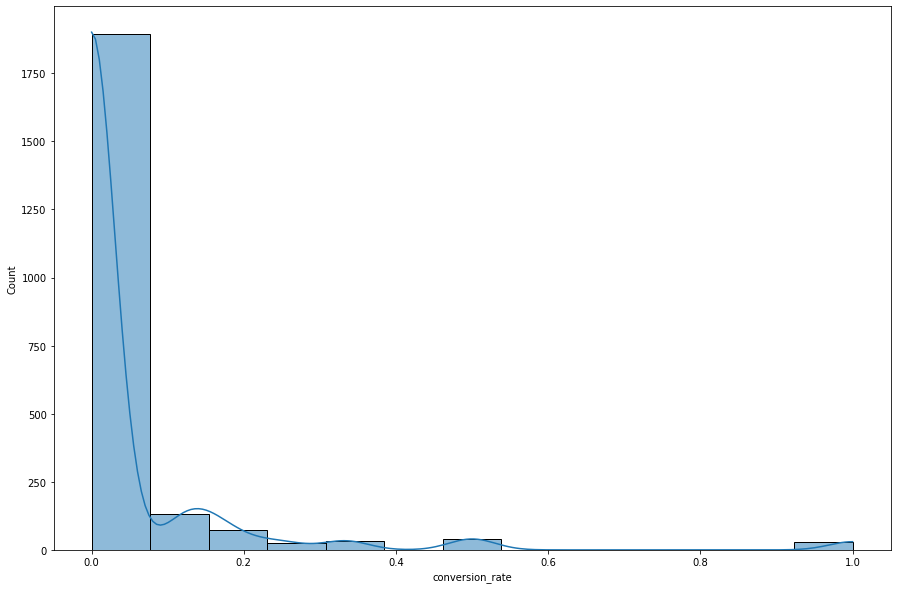

In [274]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data = df, x='conversion_rate', kde=True)
plt.show()

Dapat dilihat bahwa mayoritas pelanggan memiliki conversion_rate sama dengan nol. Untuk meningkatkan nilai conversion rate, maka kita akan menelusuri lebih lanjut hal-hal yang mempengaruhi conversion rate berdasarkan data yang ada

In [275]:
# Menghitung umur pelanggan pada saat menggunakan applikasi berdasarkan Dt_Customer dan Year
df['age'] = (df['Dt_Customer'].dt.year)-df['Year_Birth']

In [276]:
df['age'].value_counts()

41     91
42     89
38     88
37     82
43     71
       ..
16      1
114     1
71      1
72      1
73      1
Name: age, Length: 61, dtype: int64

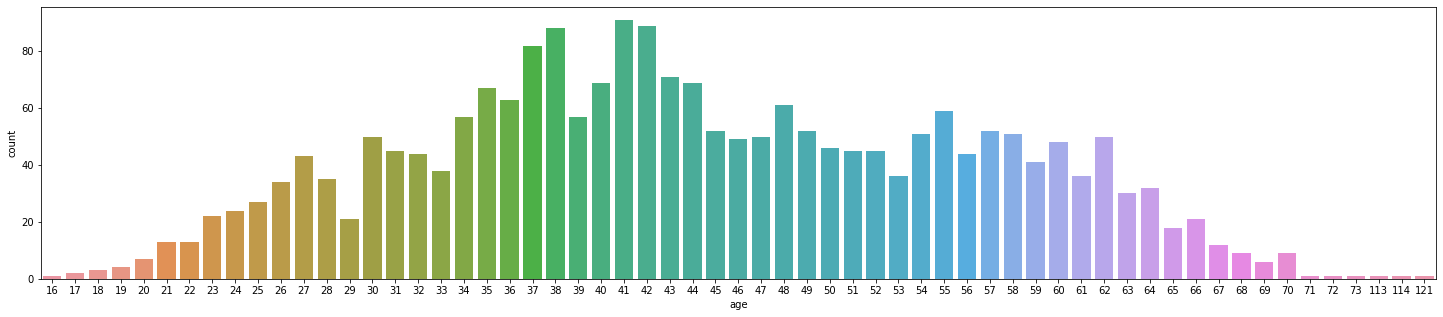

In [277]:
# melihat distribusi data umur pelanggan
plt.figure(figsize=(25,5))
sns.countplot(data = df, x='age')
plt.show()

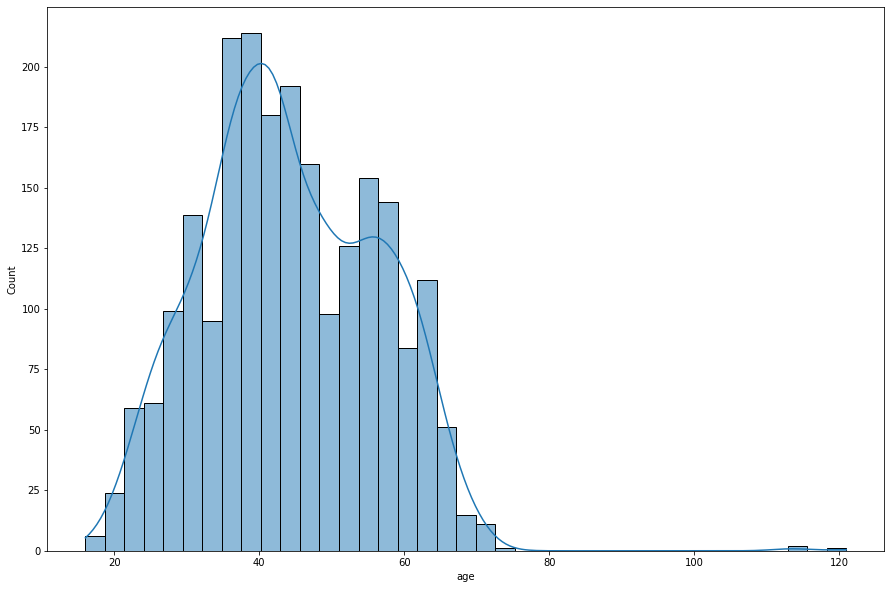

In [278]:
plt.figure(figsize=(15,10))
ax = sns.histplot(data = df, x='age', kde=True)
plt.show()

Dari visualisasi persebaran umur pelanggan ada hal yang menarik dimana terdapat beberapa pelanggan yang memilii usia lebih dari 100 tahun

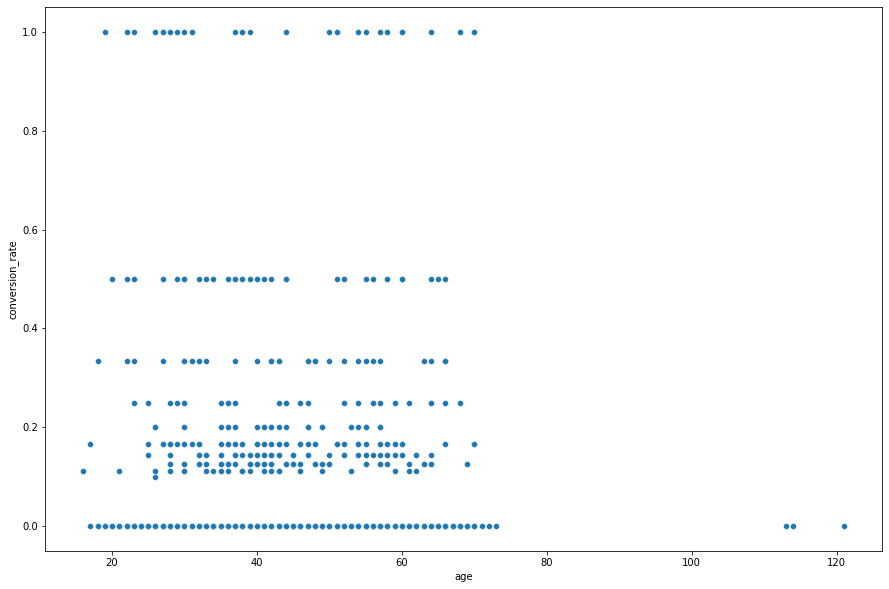

In [279]:
# Melihat Hubungan antara conversion rate dengan umur pelanggan
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='age', y='conversion_rate')
plt.show()

Hubungan antara usia dan conversion rate tidak terlihat dari plotting diatas

In [280]:
df['age_category']= np.where(df['age'] < 20,'Late Ten',
                             np.where((df['age'] >= 20) & (df['age'] < 30),'Twenty',
                                      np.where((df['age'] >= 30) & (df['age'] < 40),'Thirty',
                                               np.where((df['age'] >= 40) & (df['age'] < 50),'Fourty',
                                                        np.where((df['age'] >= 50) & (df['age'] < 60),'Fifty',
                                                                  np.where((df['age'] >= 60) & (df['age'] < 100),'Above Sixty',
                                                                           'Above Century'))))))

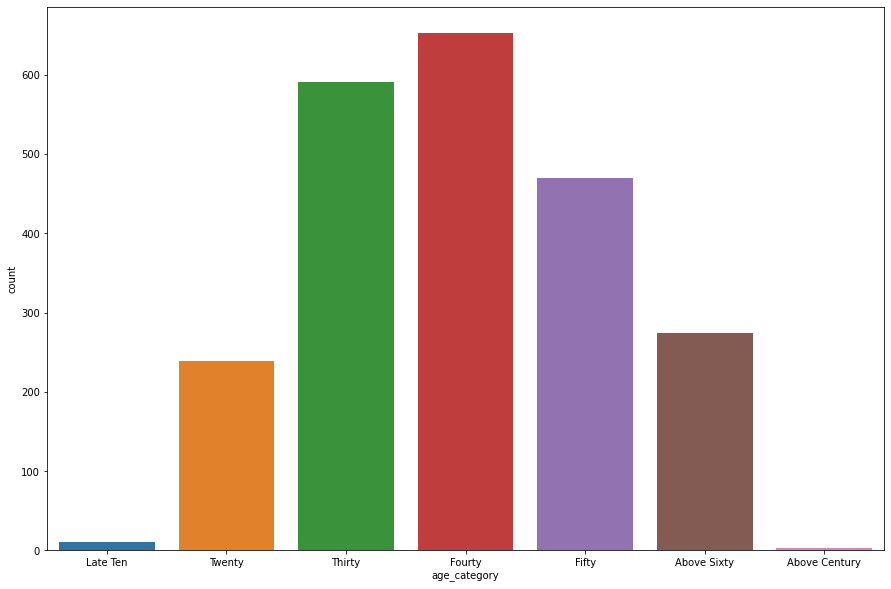

In [281]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='age_category',order=['Late Ten','Twenty','Thirty','Fourty','Fifty','Above Sixty','Above Century'])
plt.show()

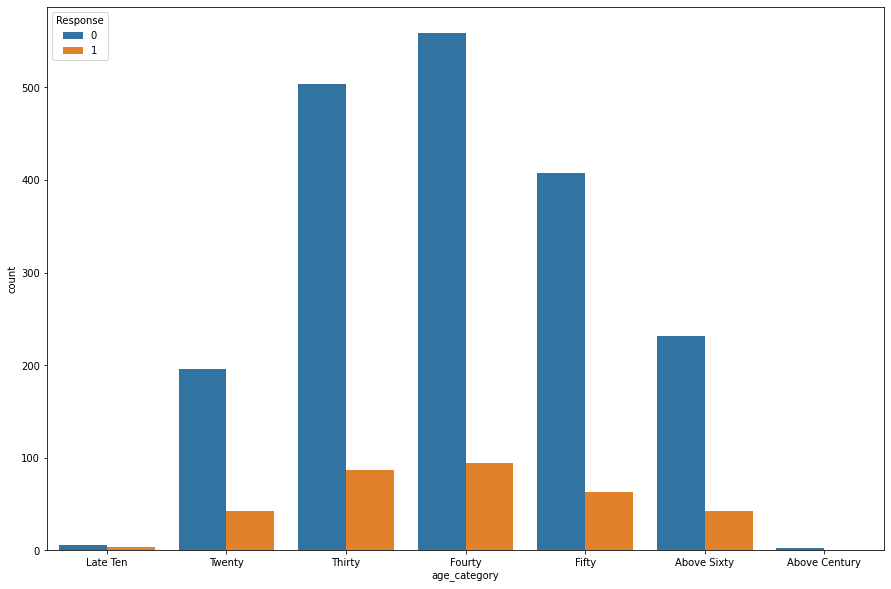

In [282]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='age_category',order=['Late Ten','Twenty','Thirty','Fourty','Fifty','Above Sixty','Above Century'],hue='Response')
plt.show()

In [283]:
response_probability = df.groupby(['age_category','Response'])['ID'].count().reset_index().rename(columns={'ID':'number_customers'})
response_probability['percentage'] = 100*(response_probability['number_customers']/response_probability.groupby(['age_category'])['number_customers'].transform('sum'))
response_probability

,age_category,Response,number_customers,percentage
0,Above Century,0,3,100.000000
1,Above Sixty,0,231,84.306569
2,Above Sixty,1,43,15.693431
3,Fifty,0,407,86.595745
4,Fifty,1,63,13.404255
5,Fourty,0,559,85.604900
6,Fourty,1,94,14.395100
7,Late Ten,0,6,60.000000
8,Late Ten,1,4,40.000000
9,Thirty,0,504,85.279188


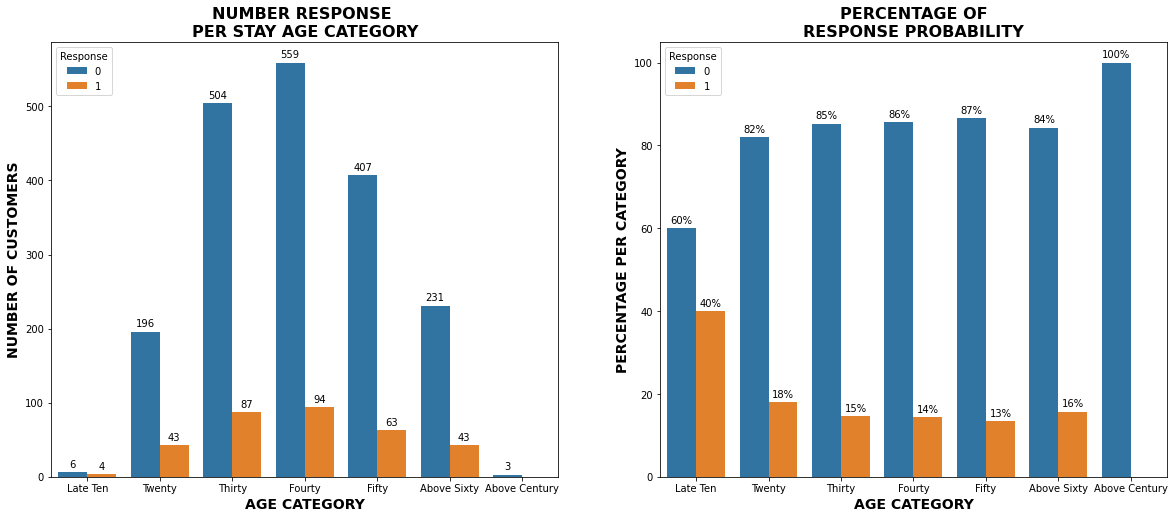

In [284]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
ax = sns.barplot(data=response_probability, x='age_category', order=['Late Ten','Twenty','Thirty','Fourty','Fifty','Above Sixty','Above Century'], y= 'number_customers', ax=axes[0], hue='Response')
ax.set_title ('NUMBER RESPONSE \nPER STAY AGE CATEGORY', fontsize = 16, weight='bold' )
ax.set_xlabel ('AGE CATEGORY', fontsize = 14, weight='bold')
ax.set_ylabel ('NUMBER OF CUSTOMERS', fontsize = 14, weight='bold')
for p in ax.patches:
  ax.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')


ax1 = sns.barplot(data=response_probability, x='age_category', order=['Late Ten','Twenty','Thirty','Fourty','Fifty','Above Sixty','Above Century'],y= 'percentage', ax=axes[1], hue='Response')
ax1.set_title ('PERCENTAGE OF\nRESPONSE PROBABILITY', fontsize = 16, weight='bold' )
ax1.set_xlabel ('AGE CATEGORY', fontsize = 14, weight='bold')
ax1.set_ylabel ('PERCENTAGE PER CATEGORY', fontsize = 14, weight='bold')
for p in ax1.patches:
  ax1.annotate('%.f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')
plt.show()

Dapat dilihat bahawasannya mayoritas pelanggan memiliki usia 30th-an dan 40th-an. akan tetapi persentase response pelanggan yang paing tinggi ada pada kategori usia di bawah 30 tahun.

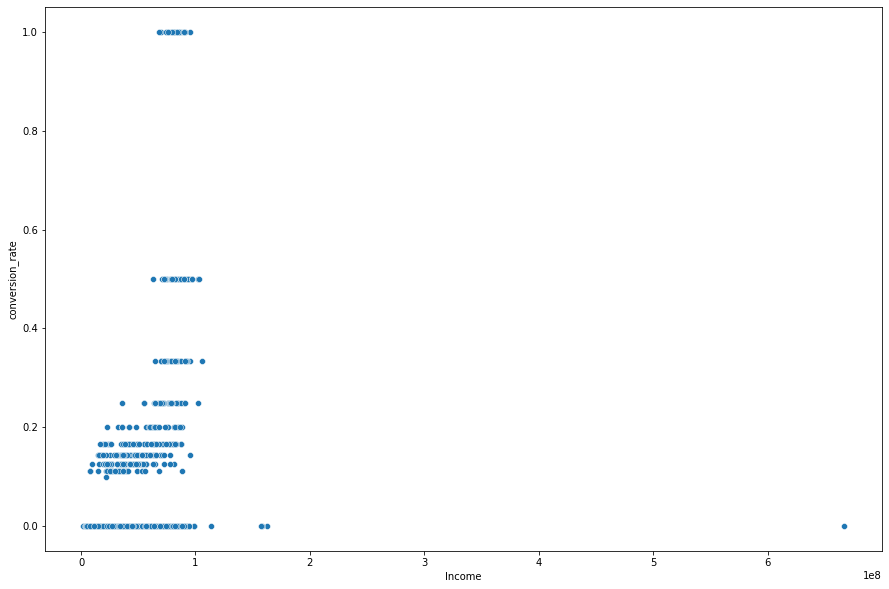

In [285]:
# Melihat hubungan antara conversion rate dengan income
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='Income', y='conversion_rate')
plt.show()

Terlihat bahwa ada sedikit kecenderungan dimana pelanggan dengan nilai conversion rate yang tinggi cenderung memiliki pengahsilan yang lebih tinggi dibandingkan dengan yang lainnya

In [286]:
# Menghitung total pengeluaran dari pelanggan
df['total_expenses']= df['MntCoke']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

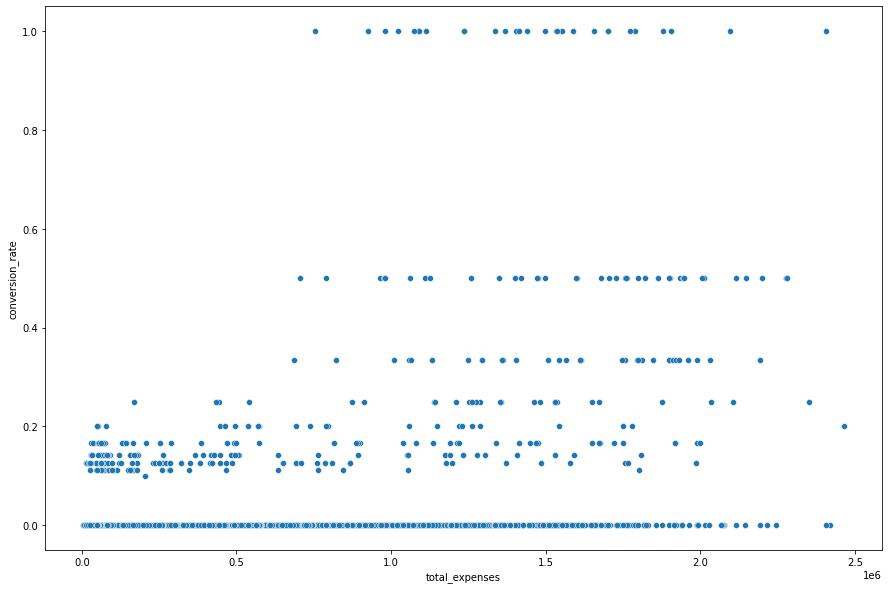

In [287]:
# Melihat hubungan antara total pengeluaran dengan conversion rate
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='total_expenses', y='conversion_rate')
plt.show()

Terlihat bahwa ada sedikit kecenderungan dimana pelanggan dengan nilai conversion rate yang tinggi cenderung memiliki pengeluaran yang lebih tinggi dibandingkan dengan yang lainnya

In [288]:
# Menghitung total pembelian (purchase) pelanggan
df['total_purchases']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

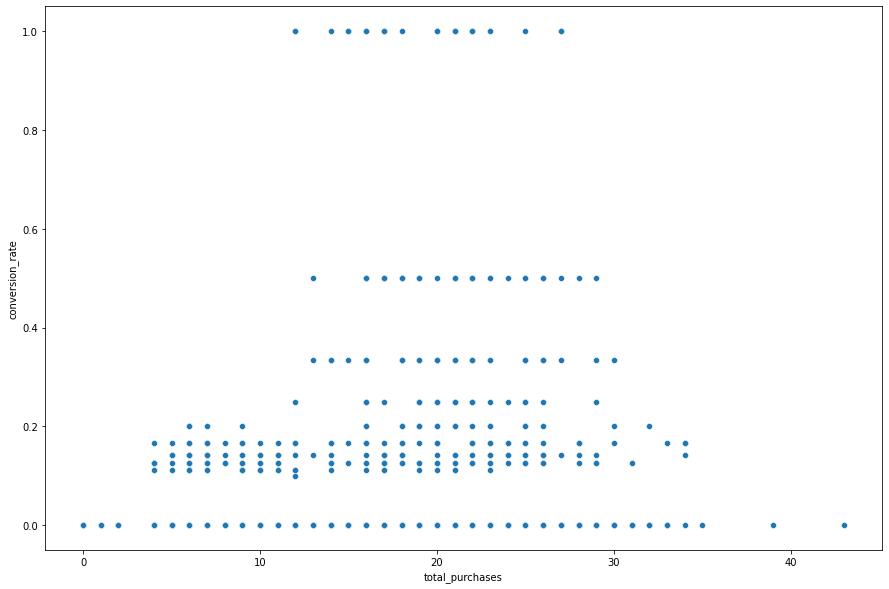

In [289]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='total_purchases', y='conversion_rate')
plt.show()

Terlihat bahwa ada sedikit kecenderungan dimana pelanggan dengan nilai conversion rate yang tinggi cenderung memiliki total pembelian yang lebih tinggi dibandingkan dengan yang lainnya

In [290]:
# Menghitung total tanggungan anak
df['dependent_child'] =df['Kidhome']+df['Teenhome']

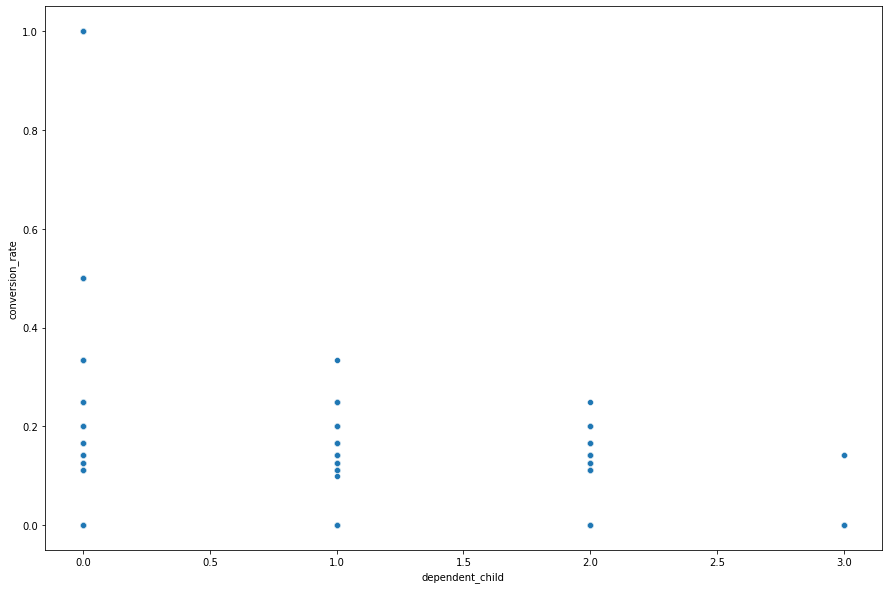

In [291]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='dependent_child', y='conversion_rate')
plt.show()

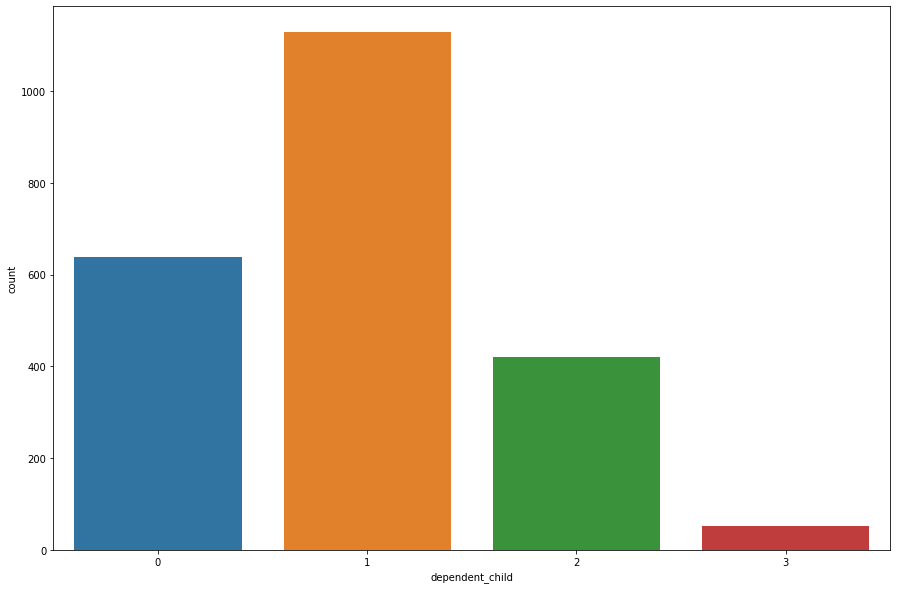

In [292]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data=df, x='dependent_child')
plt.show()

In [293]:
# Menghitung total campaign yang pernah diterima
df['total_accepted_prev_campaign'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

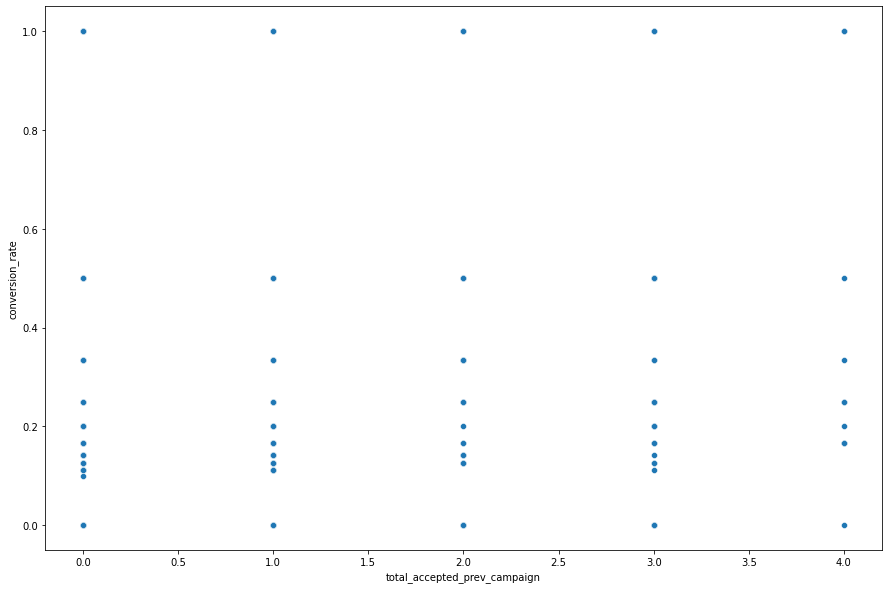

In [294]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='total_accepted_prev_campaign', y='conversion_rate')
plt.show()

Dari plot ini tidak terlihat hubungan antara jumlah campaign yang pernah di accept terhadap response.

<Figure size 1080x720 with 0 Axes>

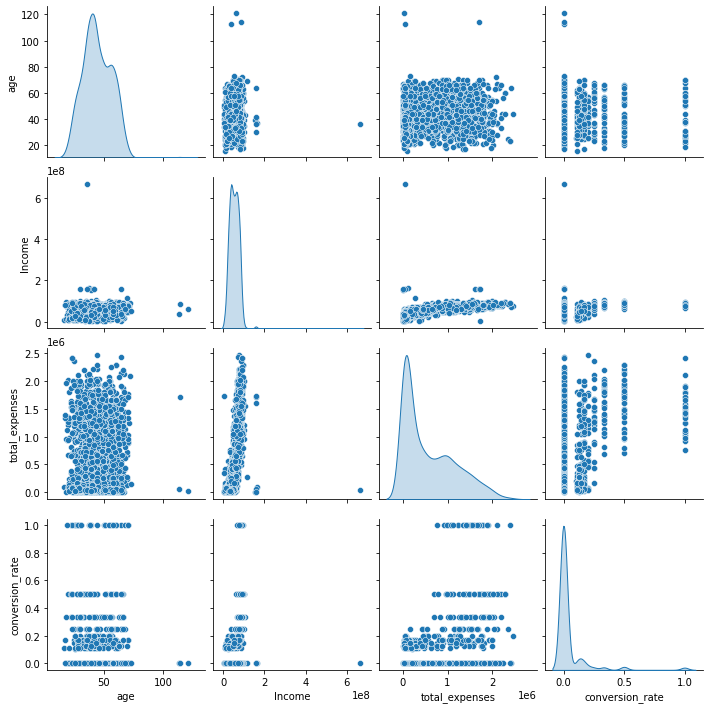

In [295]:
features = ['age', 'Income', 'total_expenses', 'conversion_rate']

plt.figure(figsize=(15,10))
sns.pairplot(data = df[features],diag_kind='kde')
plt.show()

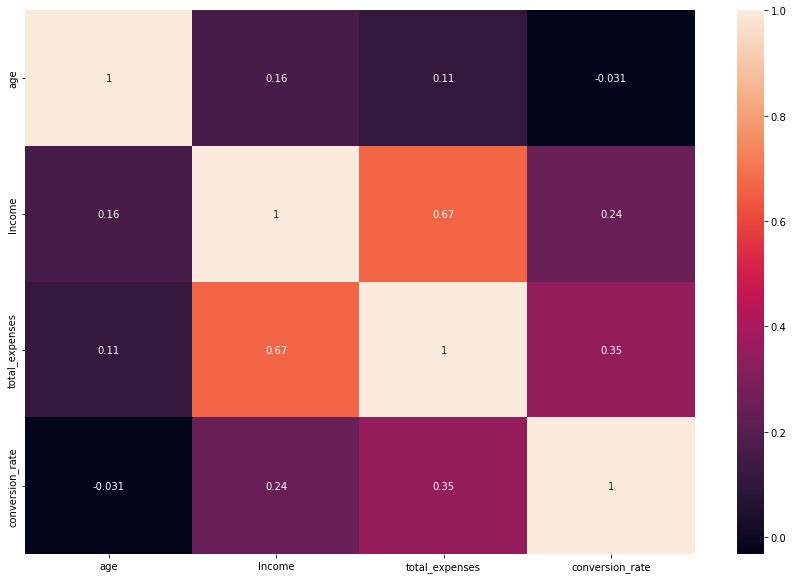

In [296]:
plt.figure(figsize=(15,10))
sns.heatmap(df[features].corr(), annot= True)
plt.show()

<Figure size 1080x720 with 0 Axes>

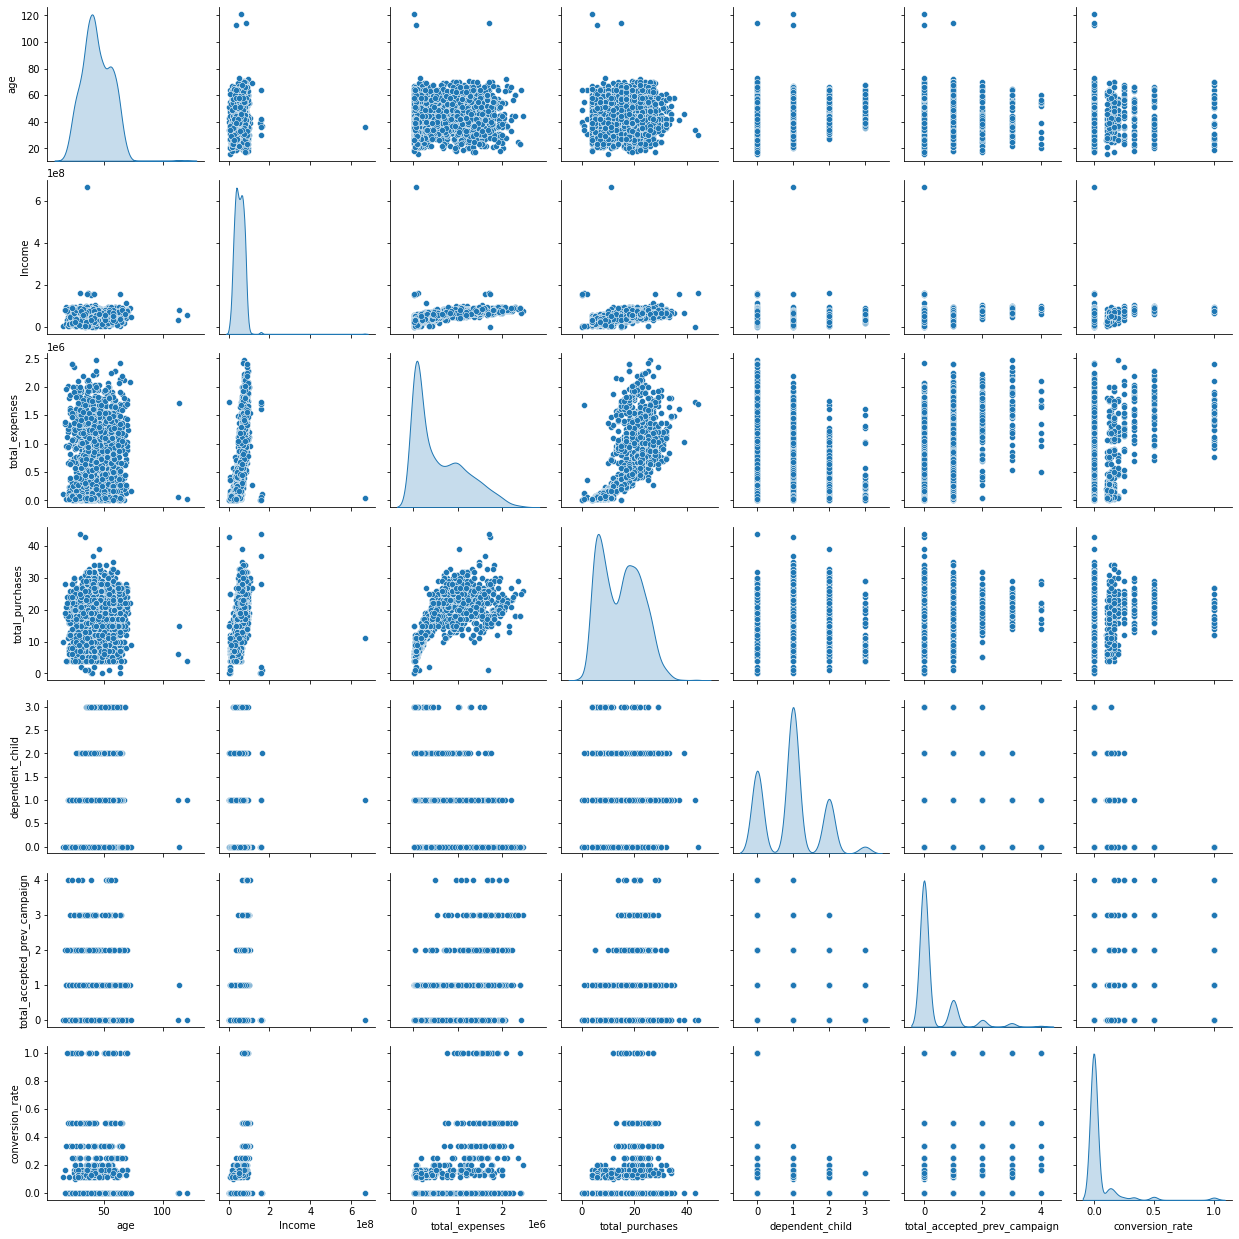

In [297]:
# melihat hubungan antar feature
features = ['age', 'Income', 'total_expenses', 'total_purchases', 'dependent_child','total_accepted_prev_campaign', 'conversion_rate']

plt.figure(figsize=(15,10))
sns.pairplot(data = df[features],diag_kind='kde')
plt.show()

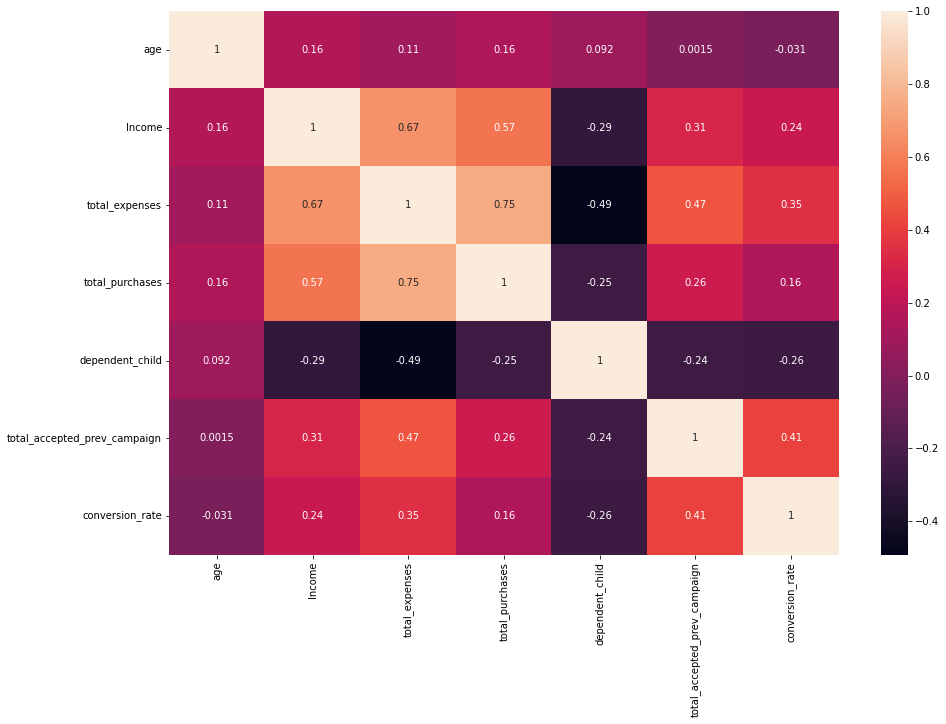

In [298]:
plt.figure(figsize=(15,10))
sns.heatmap(df[features].corr(), annot= True)
plt.show()

Dari pair plot dan heatmap diatas dapat dilihat adanya hubungan positif antara :
1. Conversion Rate dengan : total_accepted_previous_campaign, total_expenses, Income, dan total_purchases.
2. Income dengan : total_expenses, total_purchases, total_accepted_previous_campaign dan age
3. total ecpenses dengan : total_purchases

Selain itu juga erdapat hubugan negatif antara:
1. Dependent child dengan : conversion_rate,  total_accepted_previous_campaign, total_purchases, total_expenses, dan Income.

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            2240 non-null   int64         
 1   Year_Birth                    2240 non-null   int64         
 2   Education                     2240 non-null   object        
 3   Marital_Status                2240 non-null   object        
 4   Income                        2216 non-null   float64       
 5   Kidhome                       2240 non-null   int64         
 6   Teenhome                      2240 non-null   int64         
 7   Dt_Customer                   2240 non-null   datetime64[ns]
 8   Recency                       2240 non-null   int64         
 9   MntCoke                       2240 non-null   int64         
 10  MntFruits                     2240 non-null   int64         
 11  MntMeatProducts               

In [300]:
# Melihat jumlah missing value
df.isna().sum()

ID                               0
Year_Birth                       0
Education                        0
Marital_Status                   0
Income                          24
Kidhome                          0
Teenhome                         0
Dt_Customer                      0
Recency                          0
MntCoke                          0
MntFruits                        0
MntMeatProducts                  0
MntFishProducts                  0
MntSweetProducts                 0
MntGoldProds                     0
NumDealsPurchases                0
NumWebPurchases                  0
NumCatalogPurchases              0
NumStorePurchases                0
NumWebVisitsMonth                0
AcceptedCmp3                     0
AcceptedCmp4                     0
AcceptedCmp5                     0
AcceptedCmp1                     0
AcceptedCmp2                     0
Complain                         0
Z_CostContact                    0
Z_Revenue                        0
Response            

Terdapat missing value pada income sejumlah 24 data dan conversion rate sejumlah 11 data

In [301]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Z_CostContact,Z_Revenue,Response,conversion_rate,age,age_category,total_expenses,total_purchases,dependent_child,total_accepted_prev_campaign
10,1994,1983,S1,Menikah,NaN,1,0,2013-11-15,11,5000,...,3,11,0,0.0,30,Thirty,14000,4,1,0
27,5255,1986,S1,Lajang,NaN,1,0,2013-02-20,19,5000,...,3,11,0,0.0,27,Twenty,636000,27,1,0
43,7281,1959,S3,Lajang,NaN,0,0,2013-05-11,80,81000,...,3,11,0,0.0,54,Fifty,175000,9,0,0
48,7244,1951,S1,Lajang,NaN,2,1,2014-01-01,96,48000,...,3,11,0,0.0,63,Above Sixty,119000,10,3,0
58,8557,1982,S1,Lajang,NaN,1,0,2013-06-17,57,11000,...,3,11,0,0.0,31,Thirty,43000,7,1,0
71,10629,1973,D3,Menikah,NaN,1,0,2012-09-14,25,25000,...,3,11,0,0.0,39,Thirty,106000,9,1,0
90,8996,1957,S3,Menikah,NaN,2,1,2012-11-19,4,230000,...,3,11,0,0.0,55,Fifty,561000,29,3,0
91,9235,1957,S1,Lajang,NaN,1,1,2014-05-27,45,7000,...,3,11,0,0.0,57,Fifty,18000,4,2,0
92,5798,1973,S2,Bertunangan,NaN,0,0,2013-11-23,87,445000,...,3,11,0,0.0,40,Fourty,948000,15,0,0
128,8268,1961,S3,Menikah,NaN,0,1,2013-11-07,23,352000,...,3,11,0,0.0,52,Fifty,404000,17,1,0


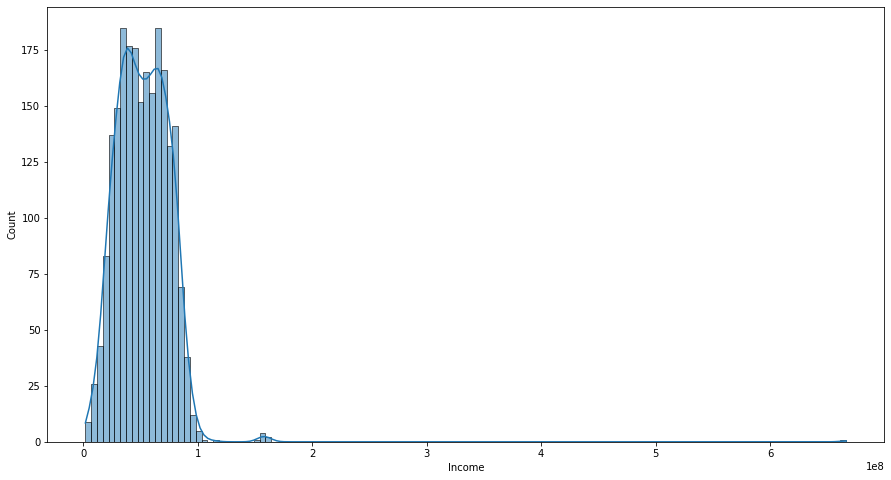

In [302]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Income', kde=True)
plt.show()

Dapat dilihat bahwa data income memiliki distribusi skew positif sehingga akan digunakan median untuk mengisi null value pada data Income

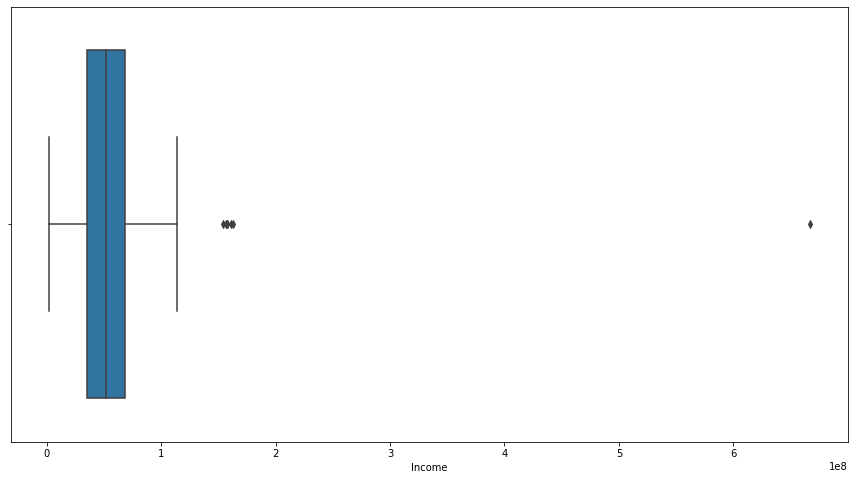

In [303]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Income')
plt.show()

In [304]:
# Mengisi data kosong income dengan median
df['Income'].fillna(df['Income'].quantile(0.5),inplace=True)
df.isna().sum()

ID                               0
Year_Birth                       0
Education                        0
Marital_Status                   0
Income                           0
Kidhome                          0
Teenhome                         0
Dt_Customer                      0
Recency                          0
MntCoke                          0
MntFruits                        0
MntMeatProducts                  0
MntFishProducts                  0
MntSweetProducts                 0
MntGoldProds                     0
NumDealsPurchases                0
NumWebPurchases                  0
NumCatalogPurchases              0
NumStorePurchases                0
NumWebVisitsMonth                0
AcceptedCmp3                     0
AcceptedCmp4                     0
AcceptedCmp5                     0
AcceptedCmp1                     0
AcceptedCmp2                     0
Complain                         0
Z_CostContact                    0
Z_Revenue                        0
Response            

In [305]:
# melihat data dengan conversion rate null
df[df['conversion_rate'].isna()][['Response','NumWebVisitsMonth']]

,Response,NumWebVisitsMonth
164,0,0
655,0,0
687,0,0
905,0,0
975,0,0
1773,0,0
1806,0,0
1910,0,0
1955,0,0
2132,0,0


Dapat dilihat bahwasannya seluruh data null pada conversion rate memiliki nilai response sama dengan nol, maka dari itu data null pada conversion rate akan kami ubah menjadi nol.

In [306]:
# Mengubah null value conversion rate dengan nol
df['conversion_rate'].fillna(0, inplace = True)
df.isna().sum()

ID                              0
Year_Birth                      0
Education                       0
Marital_Status                  0
Income                          0
Kidhome                         0
Teenhome                        0
Dt_Customer                     0
Recency                         0
MntCoke                         0
MntFruits                       0
MntMeatProducts                 0
MntFishProducts                 0
MntSweetProducts                0
MntGoldProds                    0
NumDealsPurchases               0
NumWebPurchases                 0
NumCatalogPurchases             0
NumStorePurchases               0
NumWebVisitsMonth               0
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   0
Z_Revenue                       0
Response                        0
conversion_rat

In [307]:
# Melihat jumlah data duplikat
df.duplicated().sum()

0

Tidak ditemukan adanya data duplikat

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            2240 non-null   int64         
 1   Year_Birth                    2240 non-null   int64         
 2   Education                     2240 non-null   object        
 3   Marital_Status                2240 non-null   object        
 4   Income                        2240 non-null   float64       
 5   Kidhome                       2240 non-null   int64         
 6   Teenhome                      2240 non-null   int64         
 7   Dt_Customer                   2240 non-null   datetime64[ns]
 8   Recency                       2240 non-null   int64         
 9   MntCoke                       2240 non-null   int64         
 10  MntFruits                     2240 non-null   int64         
 11  MntMeatProducts               

In [309]:
# Melihat value pada kolom kategori Education
df[['Education']].value_counts()   

Education
S1           1127
S3            486
S2            370
D3            203
SMA            54
dtype: int64

In [310]:
# Melihat value pada kolom kategori Marital_Status
df[['Marital_Status']].value_counts()

Marital_Status
Menikah           864
Bertunangan       580
Lajang            484
Cerai             232
Janda              77
Duda                3
dtype: int64

In [311]:
# Menggunakan labelling untuk melakukan encoding pada kolom education
mapping_edu = {
    'SMA' : 1,
    'D3' : 2,
    'S1' : 3,
    'S2' : 4,
    'S3' : 5
}

df['education_encode'] = df['Education'].map(mapping_edu)

In [312]:
df[['Education','education_encode']]

,Education,education_encode
0,S1,3
1,S1,3
2,S1,3
3,S1,3
4,S3,5
...,...,...
2235,S1,3
2236,S3,5
2237,S1,3
2238,S2,4


In [313]:
# Menggunakan onehot encoding pada kolom Marital Status untuk membedakan pelanggan dalam status menikah atau tidak
df['is_married'] = np.where (df['Marital_Status']=='Menikah', 1, 0)

In [314]:
df[['Marital_Status', 'is_married']]

,Marital_Status,is_married
0,Lajang,0
1,Lajang,0
2,Bertunangan,0
3,Bertunangan,0
4,Menikah,1
...,...,...
2235,Menikah,1
2236,Bertunangan,0
2237,Cerai,0
2238,Bertunangan,0


In [315]:
# Melihat value pada kolom Z_Revenue
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [316]:
# Melihat value pada kolom Z_CostContact
df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

Dapat dilihat bahwa value pada Z_Revenue dan Z_CostContact bernilai konstanta 1 nilai, sehingga dapat di drop.

In [317]:
df = df.drop(columns=['Z_Revenue','Z_CostContact'])

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            2240 non-null   int64         
 1   Year_Birth                    2240 non-null   int64         
 2   Education                     2240 non-null   object        
 3   Marital_Status                2240 non-null   object        
 4   Income                        2240 non-null   float64       
 5   Kidhome                       2240 non-null   int64         
 6   Teenhome                      2240 non-null   int64         
 7   Dt_Customer                   2240 non-null   datetime64[ns]
 8   Recency                       2240 non-null   int64         
 9   MntCoke                       2240 non-null   int64         
 10  MntFruits                     2240 non-null   int64         
 11  MntMeatProducts               

Pada tahapan feature selection, kami akan gunakan beberapa fitur yang ada untuk menentukan tigkat kepentingan pelanggan menggunakan analisa RFM dimana:
1. Recency : Recency
2. Frequency : Total Purchases
3. Monetary : Total Expenses


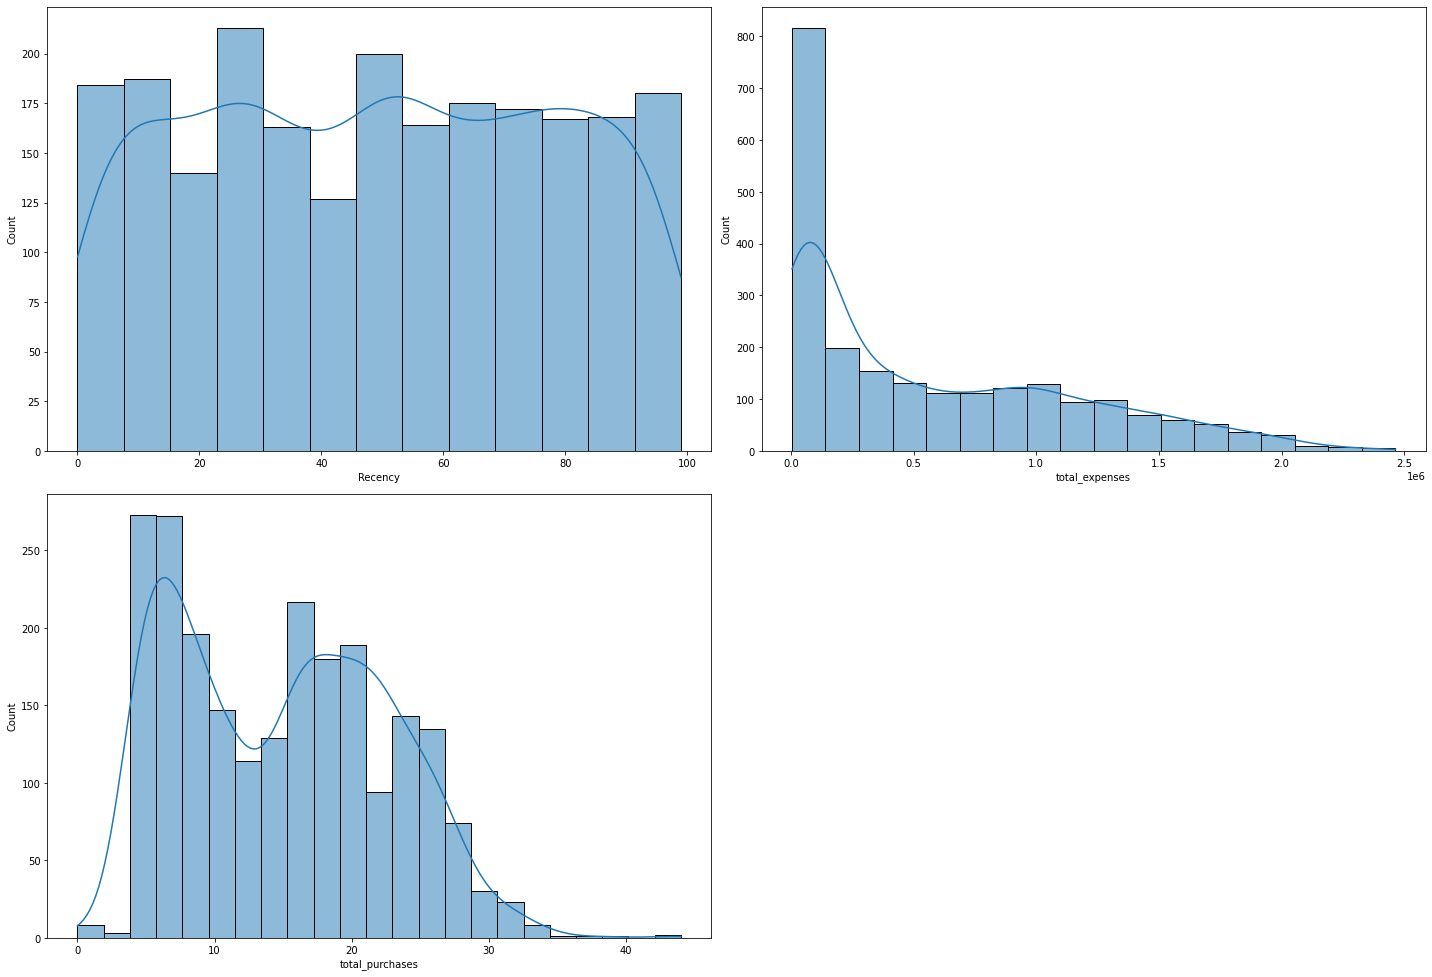

In [319]:
# Melihat distribusi dari feature yang dipilih
features = ['Recency','total_expenses', 'total_purchases']

plt.figure(figsize=(20,20))
for i in range(len(features)):
  plt.subplot(3,2,i+1)
  sns.histplot(data=df, x=features[i], kde=True)
  plt.tight_layout()

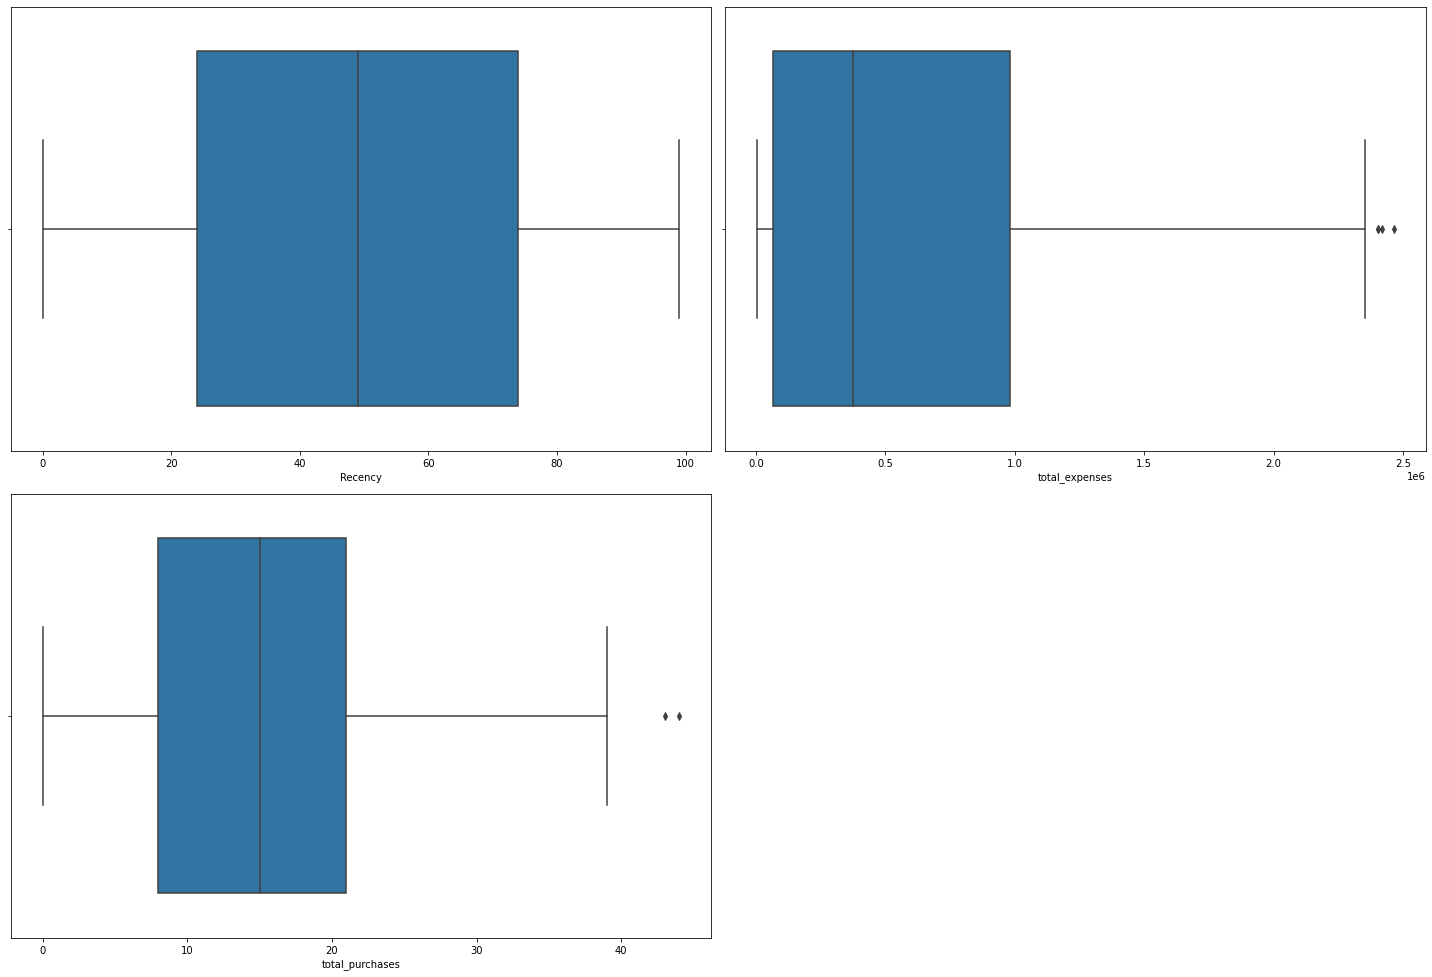

In [320]:
plt.figure(figsize=(20,20))
for i in range(len(features)):
  plt.subplot(3,2,i+1)
  sns.boxplot(data=df, x=features[i])
  plt.tight_layout()

Dapat dilihat adanya nilai outlier pada feature total purchase dan total expenses, akan tetapi nilai outlier tersebut tidak terlalu jauh dari upper hinge data sehingga dapat diabaikan.

Selain itu dapat dilihat adanya perbedaan range value ketiga feature tersebut sehingga perlu dilakukan standarisasi.

In [321]:
from sklearn.preprocessing import StandardScaler

In [322]:
# Melakukan standarisasi dari fitur yang akan digunakan
df['recency_std'] = StandardScaler().fit_transform(df['Recency'].values.reshape(len(df), 1))
df['total_expenses_std'] = StandardScaler().fit_transform(df['total_expenses'].values.reshape(len(df), 1))
df['total_purchases_std'] = StandardScaler().fit_transform(df['total_purchases'].values.reshape(len(df), 1))

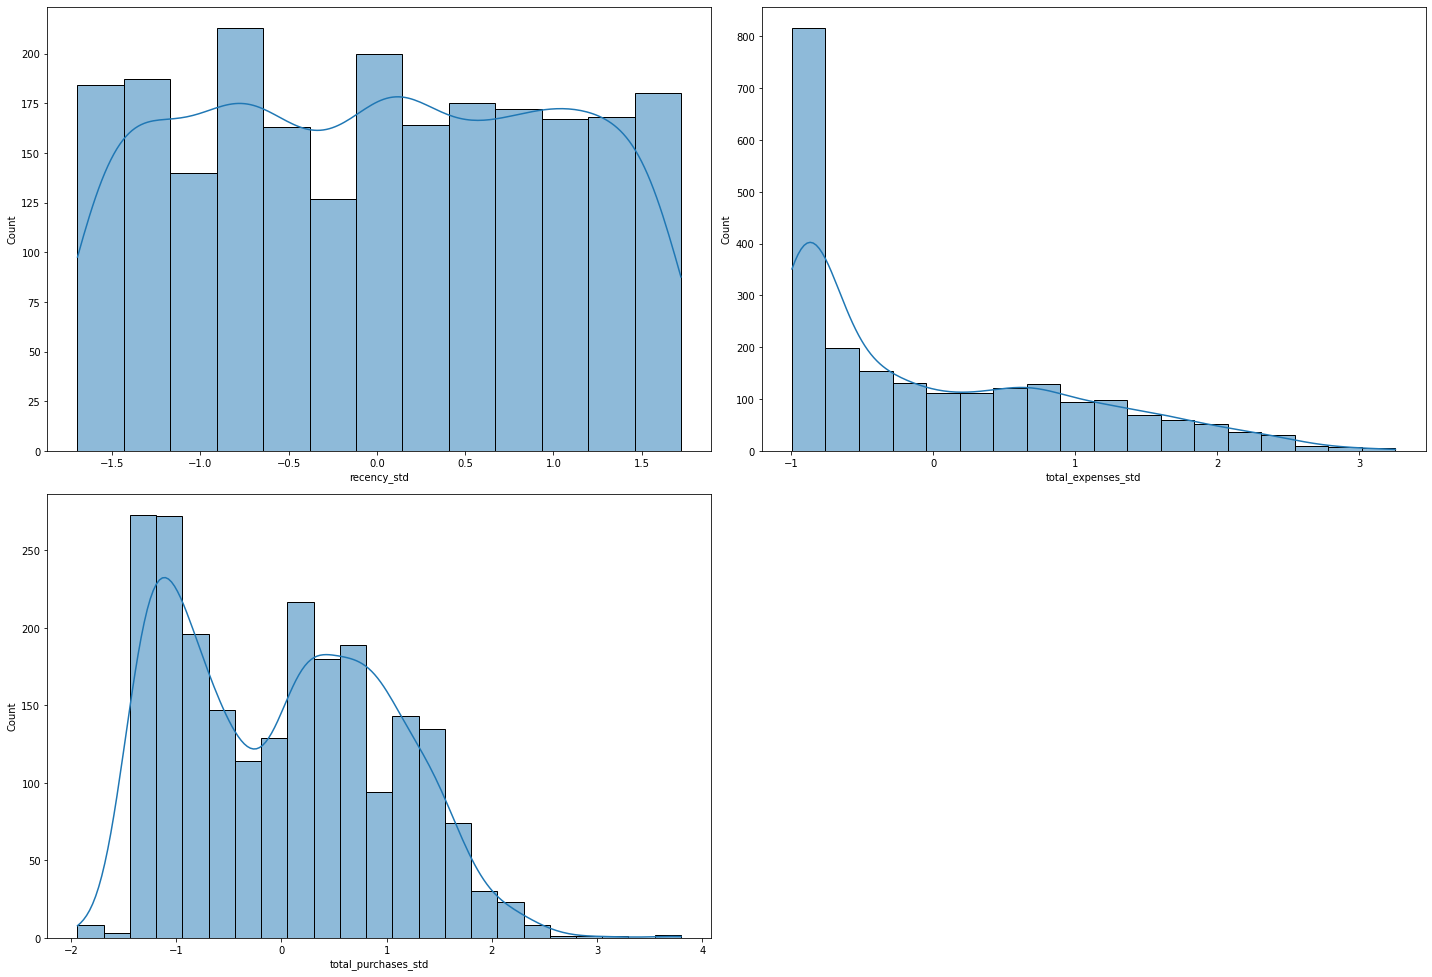

In [323]:
features_std = ['recency_std','total_expenses_std', 'total_purchases_std']

plt.figure(figsize=(20,20))
for i in range(len(features_std)):
  plt.subplot(3,2,i+1)
  sns.histplot(data=df, x=features_std[i], kde=True)
  plt.tight_layout()

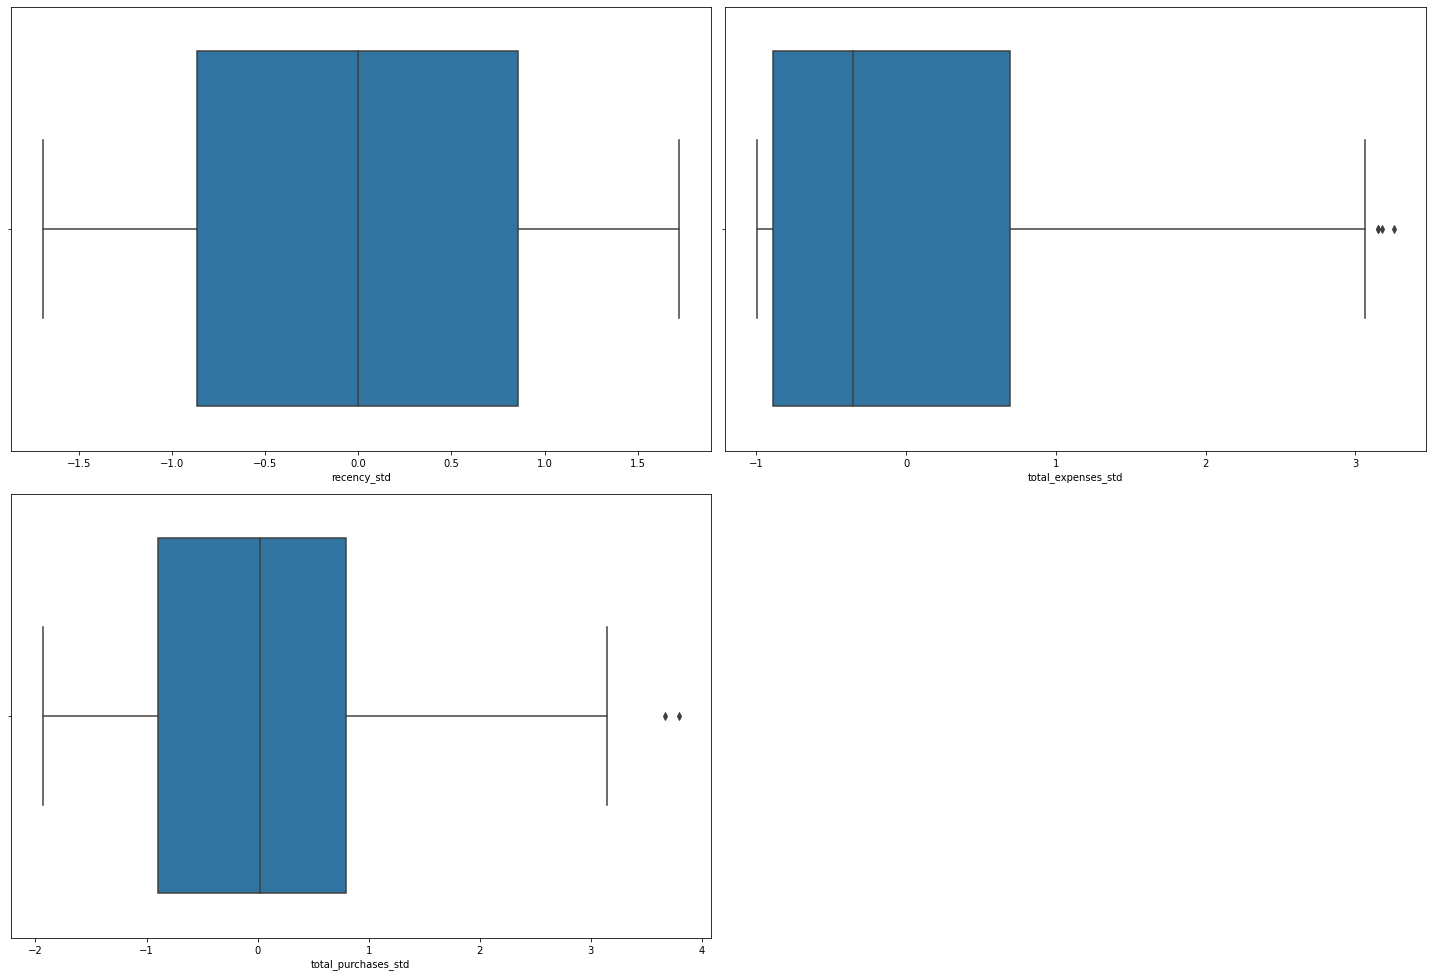

In [324]:
plt.figure(figsize=(20,20))
for i in range(len(features_std)):
  plt.subplot(3,2,i+1)
  sns.boxplot(data=df, x=features_std[i])
  plt.tight_layout()

[3594.4256076111997, 2628.282357333007, 1917.6969962348917, 1616.53548164405, 1397.751672059399, 1244.6489822743044, 1104.2807145417783, 1005.3743884953359, 929.5914215782227]


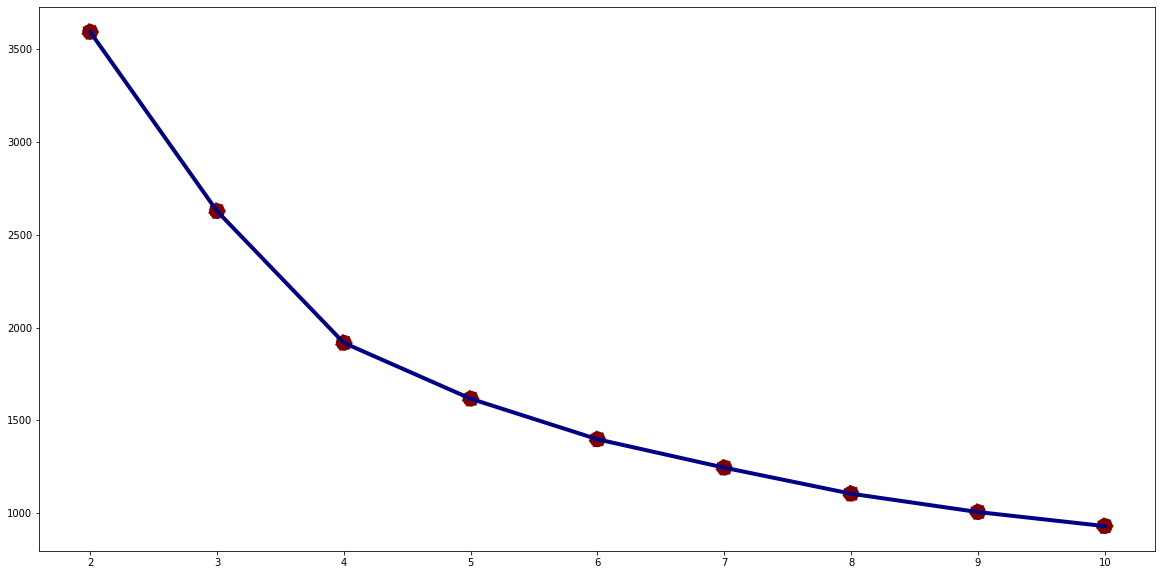

In [325]:
# Melakukan clustering menggunakan kmeans
# Menentukan jumlah cluster optimum menggunakan elbow method
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10, random_state=0)
    kmeans.fit(df[features_std].values)
    inertia.append(kmeans.inertia_)


print(inertia)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

Berdasarkan penilaian elbow method, dari grafik diatas dapat dilihat bahwa jumlah cluster paling optimum adalah 4.

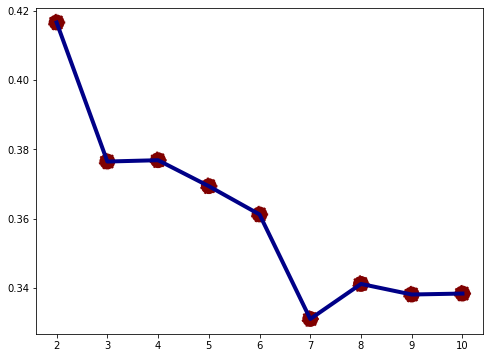

In [326]:
# Evaluasi jumlah cluster menggunakan silhouete score
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df[features_std])
    preds = kmeans.predict(df[features_std])
     
    score_euclidean = silhouette_score(df[features_std], preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

Dari grafik silhouete diatas dapat dilihat bahwa jumlah kluster paling optimum adalah 2. Akan tetapi jika hanya menggunakan 2 kluster, maka variasi dari 3 feature yang digunakan masi belum dapat tergambarkan. Maka dari itu kami akan menggunakan jumlah kluster dengan nilai silhouete terbesar kedua, yaitu 4 sebagaimana juga ditunjukkan pada hasil pengecekan dengan metode elbow.

In [327]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(df[features_std].values)

KMeans(n_clusters=4, random_state=0)

In [328]:
clusters = kmeans.labels_

df['clusters'] = clusters
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,total_expenses,total_purchases,dependent_child,total_accepted_prev_campaign,education_encode,is_married,recency_std,total_expenses_std,total_purchases_std,clusters
1634,10906,1948,S3,Bertunangan,46681000.0,0,2,2013-08-10,52,269000,...,410000,16,2,0,5,0,0.099828,-0.292971,0.148258,1
1376,1542,1975,S1,Lajang,56243000.0,1,2,2013-12-30,26,347000,...,396000,20,3,0,3,0,-0.798086,-0.317170,0.669399,2
857,425,1985,S1,Menikah,55357000.0,2,0,2013-02-19,66,374000,...,663000,22,2,0,3,1,0.583321,0.144335,0.929970,3
632,5156,1970,D3,Menikah,62466000.0,0,1,2014-01-15,13,129000,...,760000,26,1,0,2,1,-1.247043,0.311998,1.451111,2
902,6445,1967,S1,Bertunangan,66825000.0,0,0,2013-07-14,73,243000,...,757000,16,0,0,3,0,0.825067,0.306813,0.148258,3


In [329]:
cluster_desc=df[['clusters','Recency', 'total_purchases', 'total_expenses']].groupby('clusters').agg(['min','max','median','mean']).reset_index()

In [330]:
display(cluster_desc)

clusters Recency                       total_purchases             \
               min max median       mean             min max median   
0        0       0  49   24.0  24.404290               0  18    8.0   
1        1      50  99   76.0  74.783362               0  19    8.0   
2        2       0  49   24.0  23.296443              11  44   21.0   
3        3      47  99   72.0  73.099819               1  39   21.0   

             total_expenses                                    
        mean            min      max     median          mean  
0   8.676568           5000   810000    66500.0  1.236898e+05  
1   8.887348           4000   725000    72000.0  1.253241e+05  
2  21.956522         275000  2464000  1010000.0  1.075826e+06  
3  21.406534         379000  2418000  1039000.0  1.100608e+06

Berdasarkan penjabaran data terhadap kluster di atas dapat disimpulkan bahwa pelanggan terbagi menjadi 4 kategori kluster : 

1. Kluster 0 = Pelanggan baru dengan total pengeluaran dan pembelian rendah

2. Kluster 1 = Pelanggan lama dengan total pengeluaran dan pembelian rendah

3. Kluster 2 = Pelanggan baru dengan total pengeluaran dan pembelian tinggi

4. Kluster 3 = Pelanggan lama dengan total pegeluaran dan pembelian tinggi

In [331]:
# Melihat jumlah pelanggan dan conversion rate dari masing masing kluster
cluster_desc2 = df[['clusters','ID', 'conversion_rate']].groupby('clusters').agg({'ID':'count', 'conversion_rate':'mean'}).reset_index().rename(columns={'ID':'jumlah_pelanggan', 'conversion_rate':'rata-rata_conversion_rate'})

In [332]:
display(cluster_desc2)

,clusters,jumlah_pelanggan,rata-rata_conversion_rate
0,0,606,0.018154
1,1,577,0.004992
2,2,506,0.105065
3,3,551,0.055048


<function matplotlib.pyplot.show(*args, **kw)>

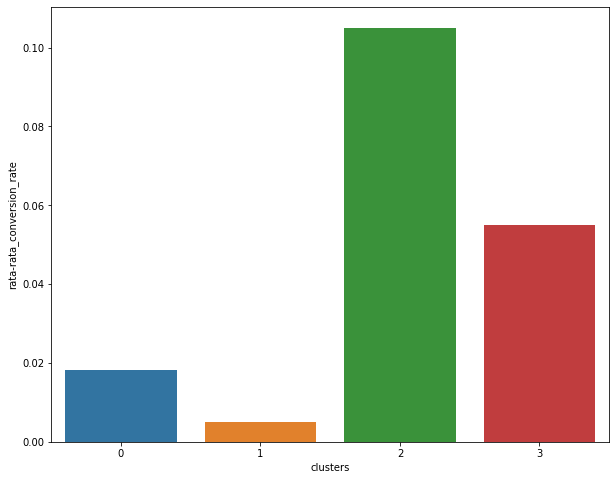

In [333]:
plt.figure(figsize=(10,8))
sns.barplot(data=cluster_desc2, x='clusters', y= 'rata-rata_conversion_rate')
plt.show

Dapat dilihat bahwakluster 2 dan 3 merupakan kluster dengan nilai conversion rate paling tinggi diantara 4 kluster yang ada. Kluster 2 dan 3 juga merupakan kluster dengan jumlah pengeluaran dan pembelian yang tinggi. Maka dari itu kluster 2 dan 3 merupakan kluster vip yang paling menguntungkan sehingga tim marketing lebih baik fokus pada kedua kluster ini agar campaign lebih tepat sasaran dan menghasilkan feedback yang lebih menguntungkan.